# 📌 Linear Regression on a Real-World Dataset using PyTorch 

## 🎬 Introduction
In this tutorial, we will build a **Linear Regression Model** using PyTorch on a real-world dataset. 

✅ We will cover:

- Understanding Linear Regression
- Loading and Preprocessing a Real-World Dataset
- Defining the Model, Loss Function, and Optimizer
- Training the Model
- Evaluating Performance

# 🏥 Predicting Diabetes Progression using Linear Regression in PyTorch


By the end of this tutorial, you'll understand how PyTorch helps in training machine learning models effectively.

---

## 📖 What is Linear Regression?
Linear Regression is one of the simplest machine learning models, used for **predicting a continuous value**. It assumes a linear relationship between input features (X) and output (Y):

\[ Y = mX + b \]

Where:
- **Y** is the target/output variable
- **X** is the input feature(s)
- **m** is the slope (weight in ML terms)
- **b** is the bias (intercept)

Our goal is to find the best values of `m` and `b` so that the model accurately predicts `Y` for given values of `X`.

---

## 🛠 Step-by-Step Implementation




### 1️⃣ Import Required Libraries

### 🔍 Why These Libraries?
- `torch` → Core PyTorch library  
- `torch.nn` → Helps build the Linear Regression model  
- `torch.optim` → Optimizers for training  
- `numpy` → Handling numerical data  
- `matplotlib.pyplot` → Visualizing dataset  
- `sklearn.datasets` → Provides the **Diabetes dataset**  
- `sklearn.model_selection` → Splits data into train & test  
- `sklearn.preprocessing` → Scales data for better training  


In [156]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 2️⃣ Load and Preprocess Dataset

- **442** samples, **10** medical predictor variables (BMI, age, blood pressure, etc.).
- **Target:** A measure of diabetes progression (numerical value).
- Our goal? **Predict diabetes progression using patient data**.


#### We extract features (X) and target (Y)

#### Splitting into training and testing sets

#### Standardizing the features (important for stable training!)

#### Converting to PyTorch tensors

In [206]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
print(X.shape)
print(y.shape)

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

(442, 10)
(442,)


## 🛠 Why Split & Normalize Data?
✅ **Splitting ensures** model generalization.  
✅ **Normalization speeds up** training & improves accuracy.  
✅ **Converting to tensors** allows PyTorch to process data efficiently.


### 3️⃣ Define the Linear Regression Model
**Initialize model**

## 🤖 Understanding the Model
- **10 Inputs** → One for each feature in the Diabetes dataset.
- **1 Output** → The predicted diabetes progression score.
- The model learns a **linear relationship** between input features and output.

In [207]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(10, 1)
        
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

### 4️⃣ Define Loss Function and Optimizer
We use **Mean Squared Error (MSE) Loss** and **Stochastic Gradient Descent (SGD) Optimizer**:

## 📌 Why MSE Loss & SGD?
- **MSE Loss** → Measures how far predictions are from actual values.  
- **SGD Optimizer** → Updates model weights based on errors.  
- **Learning Rate = 0.01** → Determines how fast the model learns.  

In [208]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### 5️⃣ Training the Model

In [210]:
epoch = 5000
for e in range(epoch):
    y_pred = model(X_train_tensor)
    error = loss(y_pred, y_train_tensor)
    optimizer.zero_grad()
    error.backward()
    optimizer.step()

    if e%1000 == 0:
        print(f"Epoch {e} -- loss/error : {error.item()}")

Epoch 0 -- loss/error : 2873.53125
Epoch 1000 -- loss/error : 2871.99267578125
Epoch 2000 -- loss/error : 2870.929443359375
Epoch 3000 -- loss/error : 2870.19482421875
Epoch 4000 -- loss/error : 2869.6865234375


## 🔄 How Training Works
1️⃣ **Forward Pass:** Model makes a prediction.  
2️⃣ **Calculate Loss:** Measures prediction error.  
3️⃣ **Backward Pass:** Computes gradients for each weight.  
4️⃣ **Update Weights:** Optimizer adjusts weights to minimize loss.  
5️⃣ **Repeat!** 🚀  


### 6️⃣ Evaluating the Model

#### Plot predictions vs. actual values:

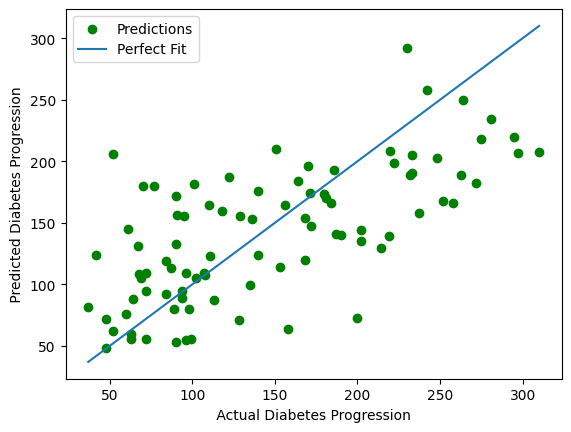

In [212]:
with torch.no_grad():
    y_test_pred = model(X_test_tensor)

y_test_pred = y_test_pred.numpy()

plt.scatter(y_test, y_test_pred, color="green", label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], label="Perfect Fit")
plt.xlabel(" Actual Diabetes Progression ")
plt.ylabel(" Predicted Diabetes Progression ")
plt.legend()
plt.show()

# 🎉 Conclusion
Congratulations! You've successfully built a **Linear Regression Model** using **PyTorch** to predict **diabetes progression**. 

## ✅ What You Learned:
✔️ Loading real-world data  
✔️ Splitting & normalizing data  
✔️ Implementing **Linear Regression** in PyTorch  
✔️ Training with **loss function & optimizer**  
✔️ Visualizing & evaluating the model  

🚀 **Next Project? Stay tuned for Project #3!**
